In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn import datasets
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [6]:
iris = pd.read_excel('/content/heart_disease.xlsx')

In [7]:
iris.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [8]:

iris['num'].value_counts()

,count
num,
0,399
1,265
2,109
3,107
4,28


In [10]:
#Complete Iris dataset. Since Y variable is categorical convert it to numerical using LabelEncoder
# If Independent variable would have been categorical we would have used one hot encoding.
label_encoder = preprocessing.LabelEncoder()
iris['num']= label_encoder.fit_transform(iris['num'])

In [11]:
iris

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,normal,4


In [23]:
from sklearn.preprocessing import LabelEncoder

In [29]:
labelencoder = LabelEncoder() # we want to label the Species column i.e.y variable
iris.iloc[:, 1] = labelencoder.fit_transform(iris.iloc[:,1]) # -1: consider last column

In [30]:
labelencoder = LabelEncoder() # we want to label the Species column i.e.y variable
iris.iloc[:, 2] = labelencoder.fit_transform(iris.iloc[:,2]) # -1: consider last column

In [32]:
labelencoder = LabelEncoder() # we want to label the Species column i.e.y variable
iris.iloc[:, 5] = labelencoder.fit_transform(iris.iloc[:,5]) # -1: consider last column

In [33]:
labelencoder = LabelEncoder() # we want to label the Species column i.e.y variable
iris.iloc[:, 6] = labelencoder.fit_transform(iris.iloc[:,6]) # -1: consider last column

In [36]:
labelencoder = LabelEncoder() # we want to label the Species column i.e.y variable
iris.iloc[:, 10] = labelencoder.fit_transform(iris.iloc[:,10]) # -1: consider last column

In [37]:
labelencoder = LabelEncoder() # we want to label the Species column i.e.y variable
iris.iloc[:, 11] = labelencoder.fit_transform(iris.iloc[:,11]) # -1: consider last column

In [42]:
iris = iris.drop(columns=['exang'])


In [25]:
iris['num'].value_counts()

,count
num,
0,399
1,265
2,109
3,107
4,28


#Split Data in x and y

In [43]:
iris.iloc[:,0:12]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,1.5,2,0,4
904,62,1,0,166,170,0,2,120,3.0,1,0,4
905,56,1,2,170,0,0,0,123,2.5,0,1,4
906,56,1,2,144,208,1,2,105,NaN,0,1,4


In [44]:
x=iris.iloc[:,0:12]
y=iris['num']
# or y=iris[:,-1]

In [45]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,1.5,2,0,4
904,62,1,0,166,170,0,2,120,3.0,1,0,4
905,56,1,2,170,0,0,0,123,2.5,0,1,4
906,56,1,2,144,208,1,2,105,NaN,0,1,4


In [16]:
y

,num
0,0
1,0
2,0
3,0
4,0
...,...
903,4
904,4
905,4
906,4


In [46]:
# Splitting data into training and testing data set. 20% data kept aside for testing
# random_state=40: To make splitting consistent across multiple runs.
# output will be 4 dataframes: xtrain, xtest, ytrain and ytest
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=0)

In [47]:
x_train.shape

(726, 12)

In [48]:
y_train

,num
372,0
304,0
524,1
85,0
530,1
...,...
835,3
192,0
629,1
559,1


In [49]:
y_test

,num
251,0
732,2
497,1
887,4
144,0
...,...
899,4
687,2
635,1
2,0


In [50]:
y_test.shape

(182,)

#Building Decision Tree Classifier using Entropy Criteria

In [51]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=2) # C5.0, max_depth of tree = 3.
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[11] <= 0.5\nentropy = 1.917\nsamples = 726\nvalue = [323, 210, 87, 84, 22]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 323\nvalue = [323, 0, 0, 0, 0]'),
 Text(0.6, 0.5, 'x[11] <= 1.5\nentropy = 1.668\nsamples = 403\nvalue = [0, 210, 87, 84, 22]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.728\nsamples = 210\nvalue = [0, 210, 0, 0, 0]'),
 Text(0.8, 0.16666666666666666, 'entropy = 1.388\nsamples = 193\nvalue = [0, 0, 87, 84, 22]')]

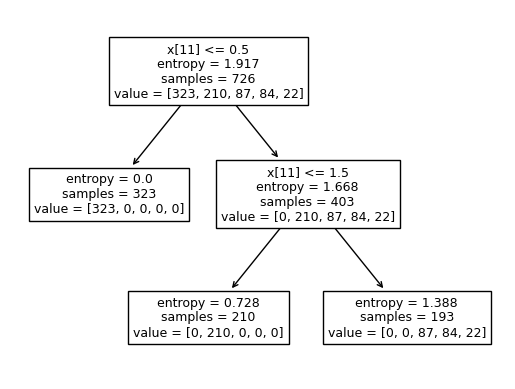

In [52]:
#PLot the decision tree
tree.plot_tree(model)

In [53]:
y_train.value_counts()

,count
num,
0,323
1,210
2,87
3,84
4,22


In [54]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

,count
0,76
1,55
2,51


In [55]:
model.feature_importances_ # shows importance of features, SL SW PL PW, PW is most imp feature, then PW.
# same is seen in tree. Petal Width is root node

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [56]:
preds # 1st data point belongs to class0, 2nd to 1, 3rd to 2 and so on

array([0, 2, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 1, 2, 1, 1, 2, 2, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1, 2, 2, 0, 0, 0, 0, 1, 0, 1,
       2, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 1,
       0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 0, 2, 1,
       1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 0, 0, 2, 2, 1, 2,
       2, 0, 1, 2, 2, 0, 0, 1, 2, 0, 0, 2, 2, 1, 1, 0, 1, 1, 2, 0, 1, 0,
       2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 1, 2, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0,
       2, 2, 2, 1, 0, 1])

In [57]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions. Actual 1 - but it is predicted as 2

col_0,0,1,2
num,,,
0,76,0,0
1,0,55,0
2,0,0,22
3,0,0,23
4,0,0,6


In [58]:
# Accuracy
np.mean(preds==y_test)

0.8406593406593407

#Building Decision Tree Classifier (CART) using Gini Criteria

In [59]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion = 'gini',max_depth=3)

In [60]:

model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [61]:
#Prediction and computing the accuracy
pred=model_gini.predict(x_test)
np.mean(pred==y_test)

0.967032967032967

#Decision Tree Regression Example

In [62]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [63]:
iris

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,1.5,2,0,4
904,62,1,0,166,170,0,2,120,3.0,1,0,4
905,56,1,2,170,0,0,0,123,2.5,0,1,4
906,56,1,2,144,208,1,2,105,NaN,0,1,4


In [64]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,1.5,2,0,4
904,62,1,0,166,170,0,2,120,3.0,1,0,4
905,56,1,2,170,0,0,0,123,2.5,0,1,4
906,56,1,2,144,208,1,2,105,NaN,0,1,4


In [65]:
y

,num
0,0
1,0
2,0
3,0
4,0
...,...
903,4
904,4
905,4
906,4


In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

In [68]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [70]:
#Find the accuracy
model.score(x_test,y_test) # score() automates the prediction of X_test and compares it with y_test and by default uses R-squared metric.
# so no need to manually derive y_pred.

0.7747232427726415